#### Importing necessary packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('regularseason.csv')

### Generating Charts

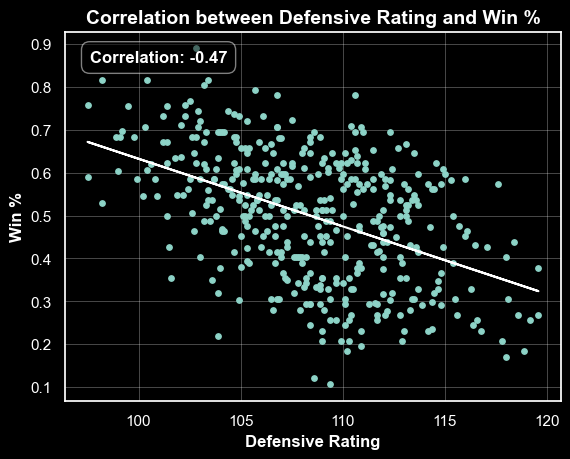

In [64]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)


    ax.scatter(df['DefRtg'], df['Win %'], s=15)
    ax.set_ylabel('Win %',fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(df['DefRtg'], df['Win %'], 1)
    ax.plot(df['DefRtg'], m*df['DefRtg'] + b, color='white')
    ax.set_xlabel('Defensive Rating',fontweight='bold')

    
    ax.set_title('Correlation between Defensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = df['Win %'].corr(df['DefRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))
    
    plt.show()

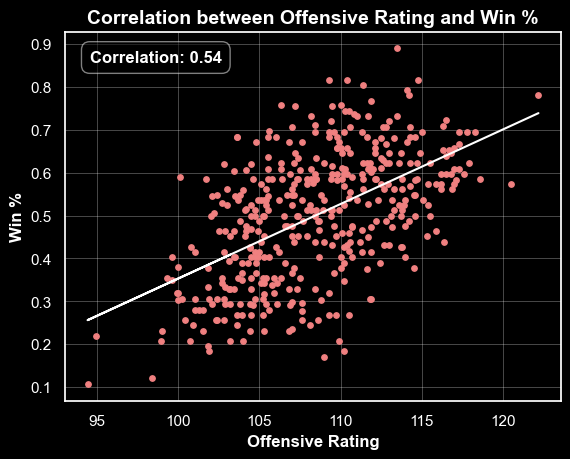

In [61]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)

    ax.scatter(df['OffRtg'], df['Win %'],s=15, color='lightcoral')
    ax.set_ylabel('Win %',fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(df['OffRtg'], df['Win %'], 1)
    ax.plot(df['OffRtg'], m*df['OffRtg'] + b, color='white')
    ax.set_xlabel('Offensive Rating', fontweight='bold')
    ax.set_title('Correlation between Offensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = df['Win %'].corr(df['OffRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

    plt.show()